In [12]:
import dask.dataframe as dd

c:\Users\YeonChan Kang\anaconda3\envs\fdb\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\YeonChan Kang\anaconda3\envs\fdb\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [13]:
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt

In [14]:
df = dd.read_csv("C:/Users/YeonChan Kang/Desktop/Local_repo/EAP_CSSR_Tutorial/data/crsp_d.csv", blocksize="64MB").drop(columns=['Unnamed: 0'])

In [15]:
df

Dask DataFrame Structure:
                permno    date      ret     retx      prc   shrout
npartitions=176                                                   
                 int64  object  float64  float64  float64  float64
                   ...     ...      ...      ...      ...      ...
...                ...     ...      ...      ...      ...      ...
                   ...     ...      ...      ...      ...      ...
                   ...     ...      ...      ...      ...      ...
Dask Name: drop_by_shallow_copy, 2 graph layers

In [16]:
missing_values = df.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
date      int64
shrout      ...
dtype: int64
Dask Name: dataframe-sum-agg, 5 graph layers

In [17]:
missing_count = ((missing_values / df.index.size) * 100)
missing_count

Dask Series Structure:
npartitions=1
date      float64
shrout        ...
dtype: float64
Dask Name: mul, 10 graph layers

In [19]:
with ProgressBar():
    missing_count_pct = missing_count.compute()
missing_count_pct

[########################################] | 100% Completed | 14.00 s


permno    0.000000
date      0.000000
ret       2.096003
retx      2.096003
prc       2.055808
shrout    0.000000
dtype: float64

In [ ]:
df = df.dropna()

In [1]:
import dask.delayed as delayed

In [2]:
def inc(i):
    return i +1

In [3]:
def add(x,y):
    return x + y

In [4]:
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x,y)

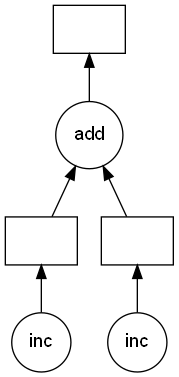

In [5]:
z.visualize()

In [ ]:
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
step2 = [delayed(multiply_four)(i) for i in step1]
total = delayed(sum)(step2)
total.visualize()

In [ ]:
data2 = [delayed(sum_two_numbers)(k, total) for k in data]
total2 = delayed(sum)(data2)
total2.visualize()

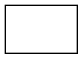

In [9]:
total_persisted = total.persist()
total_persisted.visualize()

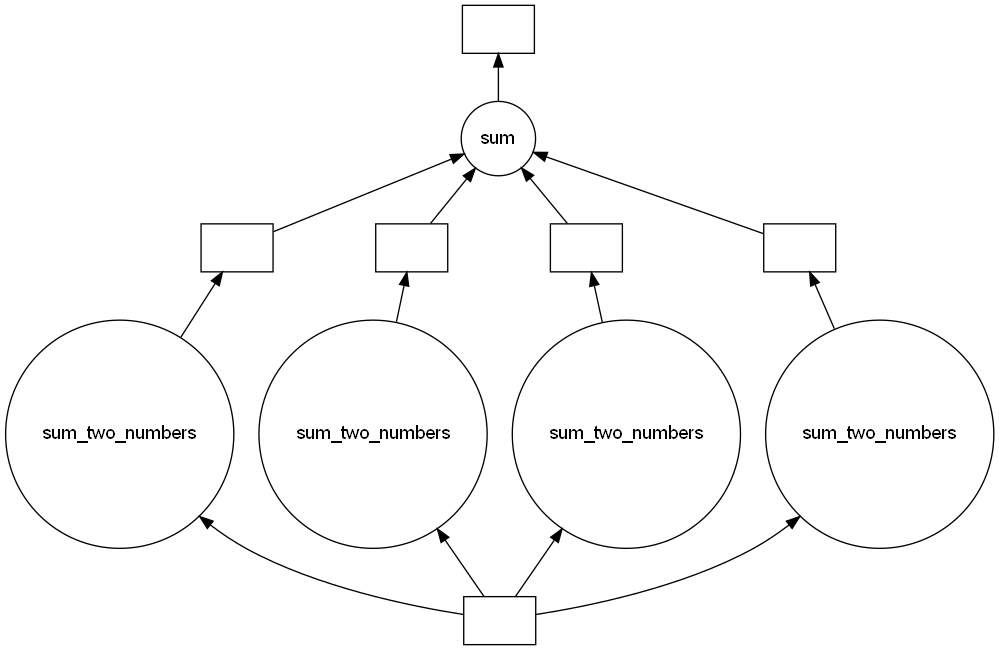

In [10]:
data2 = [delayed(sum_two_numbers)(k, total_persisted) for k in data]
total2 = delayed(sum)(data2)
total2.visualize()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.340302 to fit


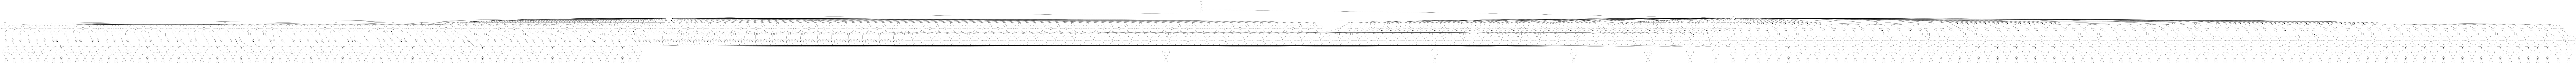

: 

In [22]:
missing_count.visualize()